In [3]:
# classify each pitcher, 0,1,2 = good, average, bad, pitcher name needs to be index as classification can not take in strings

# import win loss records of teams with pitcher names, and other stats like hits per team, runs per team

# replace pitchers name with thier classfication, dataframe should look like the below
# Astros     Opponent     Astros_Pitcher_class     opp_pitcher_class     runs_per_team     _hits_per_team     other_metrics     outcome

# will need another data frame with astros/opponents/ as model can't take in strings



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from collections import Counter
from path import Path

In [2]:
file_path = Path("random.txt")
df_iris = pd.read_csv(Path("random.txt"))
df_iris.head()

,Game#,Game Date,Seq,Opp,Lg,Result,Box,Starting Pitcher,Th,Opposing Pitcher,...,Pit,Str,Bal,Fou,Cal,Sw,InPlay,C-G,C-GS,W-L Career
0,1,2019-03-28,-,TBA,AL,W 5-1,Box | PBP,Justin Verlander,R,Blake Snell,...,100,72,28,21,15,21,15,421,421,205-123
1,2,2019-03-29,-,TBA,AL,L 2-4,Box | PBP,Gerrit Cole,R,Charlie Morton,...,97,67,30,22,14,16,15,160,160,74-48
2,3,2019-03-30,-,TBA,AL,L 1-3,Box | PBP,Collin McHugh,R,Tyler Glasnow,...,80,55,25,18,13,15,9,176,112,54-39
3,4,2019-03-31,-,TBA,AL,L 1-3,Box | PBP,Wade Miley,L,Yonny Chirinos,...,87,60,27,15,14,9,22,217,213,71-77
4,5,2019-04-01,-,TEX,AL,W 2-1,Box | PBP,Brad Peacock,R,Drew Smyly,...,86,54,32,16,13,9,16,156,69,28-24


In [3]:
# df_ts = df_iris.drop(columns = ["Game#", "Game Date", "Seq", "Lg", "Box", "Th",S-G,S-GS,WL,W-L,QS,CG,SHO,IP,H,R,ER,HR,BB,SO,WP,BK,HB,IBB,GB,FB,ERA,WHIP,Pit,Str,Bal,Fou,Cal,Sw,InPlay,C-G,C-GS,W-L Career])

df_new = df_iris[["Opp", "Result", "Starting Pitcher", "Opposing Pitcher"]]

In [4]:
count = len(df_new)

C:\Users\dovu9\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


IndexError: list index out of range

In [26]:
df_new["WL"] = df_new["Result"].str.split().iloc[0][0]
# df_new["Score"] = df_new["Result"].str.split().iloc[0][1]
# df_new.drop(columns= ['Result'], inplace=True)

C:\Users\dovu9\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
df_new

,Opp,Result,Starting Pitcher,Opposing Pitcher
0,TBA,W 5-1,Justin Verlander,Blake Snell
1,TBA,L 2-4,Gerrit Cole,Charlie Morton
2,TBA,L 1-3,Collin McHugh,Tyler Glasnow
3,TBA,L 1-3,Wade Miley,Yonny Chirinos
4,TEX,W 2-1,Brad Peacock,Drew Smyly
...,...,...,...,...
157,SEA,W 3-0,Zack Greinke,Yusei Kikuchi
158,ANA,L 3-4,Wade Miley,Jaime Barria
159,ANA,W 4-0,Jose Urquidy,Patrick Sandoval
160,ANA,W 6-3,Justin Verlander,Jose Suarez


In [66]:
# df_new["res"] = df_new.Result

C:\Users\dovu9\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_new

,Opp,Result,Starting Pitcher,Opposing Pitcher
0,TBA,W 5-1,Justin Verlander,Blake Snell
1,TBA,L 2-4,Gerrit Cole,Charlie Morton
2,TBA,L 1-3,Collin McHugh,Tyler Glasnow
3,TBA,L 1-3,Wade Miley,Yonny Chirinos
4,TEX,W 2-1,Brad Peacock,Drew Smyly
...,...,...,...,...
157,SEA,W 3-0,Zack Greinke,Yusei Kikuchi
158,ANA,L 3-4,Wade Miley,Jaime Barria
159,ANA,W 4-0,Jose Urquidy,Patrick Sandoval
160,ANA,W 6-3,Justin Verlander,Jose Suarez


In [5]:
true_w = df_new["Result"].str.contains('W', na=True)
count = 0
Result = []
for row in df_new.index:
    if true_w[row]:
        Result.append(1)
    else:
        Result.append(0)

In [7]:
df_new["Result"] = Result

C:\Users\dovu9\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_new

,Opp,Result,Starting Pitcher,Opposing Pitcher
0,TBA,1,Justin Verlander,Blake Snell
1,TBA,0,Gerrit Cole,Charlie Morton
2,TBA,0,Collin McHugh,Tyler Glasnow
3,TBA,0,Wade Miley,Yonny Chirinos
4,TEX,1,Brad Peacock,Drew Smyly
...,...,...,...,...
157,SEA,1,Zack Greinke,Yusei Kikuchi
158,ANA,0,Wade Miley,Jaime Barria
159,ANA,1,Jose Urquidy,Patrick Sandoval
160,ANA,1,Justin Verlander,Jose Suarez


In [6]:
true_w = df_new["Result"].str.contains('W', na=True)
count = 0
for row in df_new.index:
    if true_w[row]:
        print("This will work")
    else:
        break

# true_w[0]
# if true_w[0]:
#     print("hi")

This will work


In [ ]:
# df_new.loc[mask, 'a'] = df_new['b']

In [9]:
file_path = Path("mlb-player-stats-P.csv")
df = pd.read_csv(file_path)
df.head(10)

,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,A.J. Cole,CLE,28,25,0,0,0,26.0,31,11,30,8,4,3,1,1,0,0,3.81,1.50
1,A.J. Minter,ATL,27,36,0,0,0,29.1,36,23,35,23,3,3,4,5,2,6,7.06,2.01
2,A.J. Puk,OAK,25,10,0,0,0,11.1,10,4,13,5,1,2,0,0,1,2,3.18,1.32
3,Aaron Barrett,WAS,32,3,0,0,0,2.1,5,4,1,4,1,0,0,0,0,0,15.43,3.86
4,Aaron Brooks,BAL,30,14,12,0,0,59.2,69,41,39,20,9,4,5,0,0,0,6.18,1.49
5,Aaron Brooks,OAK,30,15,6,0,0,50.1,49,28,43,14,12,2,3,0,0,0,5.01,1.25
6,Aaron Bummer,CWS,27,58,0,0,0,67.2,43,16,60,24,4,0,0,1,2,27,2.13,0.99
7,Aaron Civale,CLE,25,10,10,0,0,57.2,44,15,46,16,4,3,4,0,0,0,2.34,1.04
8,Aaron Loup,SD,32,4,0,0,0,3.1,2,0,5,1,0,0,0,0,0,1,0.00,0.90
9,Aaron Nola,PHI,27,34,34,0,0,202.1,176,87,229,80,27,12,7,0,0,0,3.87,1.27


In [10]:
df.set_index(["Player"], inplace = True)

In [11]:
df = df.drop(columns = ["Team"])

In [12]:
df.head(8)

,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
Player,,,,,,,,,,,,,,,,,,
A.J. Cole,28,25,0,0,0,26.0,31,11,30,8,4,3,1,1,0,0,3.81,1.50
A.J. Minter,27,36,0,0,0,29.1,36,23,35,23,3,3,4,5,2,6,7.06,2.01
A.J. Puk,25,10,0,0,0,11.1,10,4,13,5,1,2,0,0,1,2,3.18,1.32
Aaron Barrett,32,3,0,0,0,2.1,5,4,1,4,1,0,0,0,0,0,15.43,3.86
Aaron Brooks,30,14,12,0,0,59.2,69,41,39,20,9,4,5,0,0,0,6.18,1.49
Aaron Brooks,30,15,6,0,0,50.1,49,28,43,14,12,2,3,0,0,0,5.01,1.25
Aaron Bummer,27,58,0,0,0,67.2,43,16,60,24,4,0,0,1,2,27,2.13,0.99
Aaron Civale,25,10,10,0,0,57.2,44,15,46,16,4,3,4,0,0,0,2.34,1.04


In [13]:
df = df.groupby(level=0).mean()

In [14]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=5)

In [15]:
model.fit(df)

KMeans(n_clusters=3, random_state=5)

In [16]:
predictions = model.predict(df)
print(predictions)

[2 2 2 2 0 0 0 2 1 0 2 2 2 0 0 2 2 0 0 1 2 2 2 0 2 1 2 0 2 0 2 2 2 2 0 2 0
 2 0 0 0 0 0 2 2 1 2 0 1 2 2 1 0 1 2 0 2 0 2 2 0 2 0 2 2 2 2 2 1 0 2 2 2 0
 1 0 2 2 2 0 0 0 1 0 0 2 1 0 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 0 0 0 2 1 0 2 0
 0 0 2 2 2 2 0 0 2 2 2 1 1 2 2 2 0 0 1 1 0 2 2 2 2 1 2 1 2 2 0 0 1 2 2 2 2
 2 1 2 2 0 0 0 2 2 0 2 2 2 2 2 0 2 2 1 0 2 2 2 0 2 2 0 1 0 2 2 1 2 2 0 2 2
 2 2 2 0 0 2 2 1 2 2 2 2 0 0 0 0 2 0 2 0 2 0 1 0 2 2 2 2 0 0 2 0 2 2 1 0 0
 0 0 2 2 1 2 0 2 0 2 0 2 2 2 2 1 2 2 0 0 2 0 2 0 0 0 2 2 2 2 0 0 0 0 2 0 2
 2 0 2 1 1 2 0 0 1 2 2 0 0 0 2 2 0 0 2 0 2 0 2 0 2 2 2 2 1 2 0 1 1 2 2 2 2
 0 1 2 2 0 2 1 0 2 0 1 2 2 2 2 0 2 1 2 1 0 2 2 2 2 2 1 2 2 2 2 2 0 2 0 2 2
 2 2 0 1 2 2 0 2 0 2 2 2 0 2 2 2 0 0 2 2 2 0 0 2 2 0 0 2 1 2 0 2 2 2 1 0 2
 0 1 2 2 2 2 1 1 2 0 2 2 2 0 2 2 0 1 2 1 2 0 1 2 2 2 2 0 2 1 2 0 0 0 2 2 2
 0 0 2 0 2 2 2 0 0 2 0 1 0 2 0 0 2 2 0 1 0 2 0 0 0 1 2 2 0 2 0 2 0 2 2 2 2
 0 2 0 1 1 2 2 0 2 2 1 2 0 2 2 2 0 1 0 2 1 0 2 0 2 0 2 0 2 2 0 0 1 0 2 1 0
 0 2 1 1 0 0 0 2 1 2 2 0 

In [17]:
df["class"] = model.labels_
df.head()

,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP,class
Player,,,,,,,,,,,,,,,,,,,
A.J. Cole,28.0,25.0,0.0,0.0,0.0,26.00,31.0,11.0,30.0,8.0,4.0,3.0,1.0,1.0,0.0,0.0,3.810,1.50,2
A.J. Minter,27.0,36.0,0.0,0.0,0.0,29.10,36.0,23.0,35.0,23.0,3.0,3.0,4.0,5.0,2.0,6.0,7.060,2.01,2
A.J. Puk,25.0,10.0,0.0,0.0,0.0,11.10,10.0,4.0,13.0,5.0,1.0,2.0,0.0,0.0,1.0,2.0,3.180,1.32,2
Aaron Barrett,32.0,3.0,0.0,0.0,0.0,2.10,5.0,4.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,15.430,3.86,2
Aaron Brooks,30.0,14.5,9.0,0.0,0.0,54.65,59.0,34.5,41.0,17.0,10.5,3.0,4.0,0.0,0.0,0.0,5.595,1.37,0


In [63]:
# df.loc["Justin Verlander"]["class"]

In [64]:
X = df.copy()
X.drop("class", axis=1, inplace=True)

y = df["class"].ravel()
y[:5]

array([2, 2, 2, 2, 0])

In [65]:
import hvplot.pandas
# df.hvplot.scatter(x="sepal_length", y="sepal_width", by="class")

In [66]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [67]:
df.hvplot.scatter(x="ERA", y="WHIP", by="class")

:NdOverlay   [class]
   :Scatter   [ERA]   (WHIP)

# Random Forest Code

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
# cm = confusion_matrix(y_test, predictions)
# cm_df = pd.DataFrame(
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [ ]:
# # Displaying results
# print("Confusion Matrix")
# display(cm_df)
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, predictions))

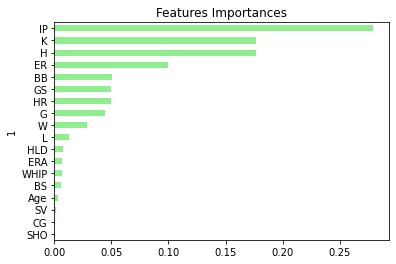

In [43]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)



# new stuff

In [18]:
# mlb-player-stats-Batters

file_path = Path("mlb-player-stats-Batters.csv")
df_bat = pd.read_csv(file_path)
df_bat = df_bat.drop(columns = ["Player"])
df_bat.head()

,Team,Pos,Age,G,AB,R,H,2B,3B,HR,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,KC,2B,31,162,681,105,206,41,10,16,...,10,45,126,0,4,5,0.302,0.348,0.463,0.811
1,OAK,SS,30,162,657,123,187,43,7,33,...,8,87,102,0,1,2,0.285,0.369,0.522,0.891
2,BOS,3B,23,156,647,129,201,54,4,32,...,8,48,119,1,2,4,0.311,0.361,0.555,0.916
3,BAL,2B,29,162,642,111,176,33,5,24,...,9,61,176,2,4,4,0.274,0.339,0.453,0.792
4,ATL,2B,23,160,640,102,189,43,8,24,...,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [19]:
df_bat_avg = df_bat.groupby(by = "Team").mean()

In [20]:
df_bat_avg = df_bat_avg[["SO", "AVG", "HBP", "SH", "HR", "RBI", "AVG", "R"]]

In [21]:
df_bat_avg.head()

,SO,AVG,HBP,SH,HR,RBI,AVG,R
Team,,,,,,,,
ARI,57.857143,0.232333,3.333333,0.238095,10.238095,35.952381,0.232333,37.714286
ATL,65.400000,0.237550,2.900000,0.150000,12.450000,40.500000,0.237550,41.950000
BAL,59.583333,0.210417,2.958333,0.791667,8.875000,29.083333,0.210417,30.333333
BOS,65.285714,0.229381,2.333333,0.857143,11.666667,40.761905,0.229381,42.809524
CHC,57.260870,0.221609,3.521739,0.304348,11.086957,33.043478,0.221609,34.869565


In [138]:
# true_w = df_new["Result"].str.contains('W', na=True)
# count = 0
# Result = []
# for row in df_new.index:
#     if true_w[row]:
#         Result.append(1)
#     else:
#         Result.append(0)

AttributeError: Can only use .str accessor with string values!

In [136]:
# df_new["Result"] = Result

C:\Users\dovu9\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
# df_new.head()

,Opp,Result,Starting Pitcher,Opposing Pitcher
0,TBA,1,Justin Verlander,Blake Snell
1,TBA,0,Gerrit Cole,Charlie Morton
2,TBA,0,Collin McHugh,Tyler Glasnow
3,TBA,0,Wade Miley,Yonny Chirinos
4,TEX,1,Brad Peacock,Drew Smyly


In [22]:
df_new.set_index(["Opp"], inplace = True)

In [23]:
merge = pd.merge(df_new, df_bat_avg, left_index=True, right_index=True)


In [24]:
merge

,Result,Starting Pitcher,Opposing Pitcher,SO,AVG,HBP,SH,HR,RBI,AVG,R
BAL,1,Gerrit Cole,Gabriel Ynoa,59.583333,0.210417,2.958333,0.791667,8.875000,29.083333,0.210417,30.333333
BAL,0,Framber Valdez,Andrew Cashner,59.583333,0.210417,2.958333,0.791667,8.875000,29.083333,0.210417,30.333333
BAL,1,Wade Miley,Dylan Bundy,59.583333,0.210417,2.958333,0.791667,8.875000,29.083333,0.210417,30.333333
BAL,1,Wade Miley,Dylan Bundy,59.583333,0.210417,2.958333,0.791667,8.875000,29.083333,0.210417,30.333333
BAL,1,Aaron Sanchez,Aaron Brooks,59.583333,0.210417,2.958333,0.791667,8.875000,29.083333,0.210417,30.333333
...,...,...,...,...,...,...,...,...,...,...,...
TOR,1,Framber Valdez,Clayton Richard,62.666667,0.207583,1.875000,0.583333,10.291667,29.041667,0.207583,30.166667
TOR,0,Brad Peacock,Trent Thornton,62.666667,0.207583,1.875000,0.583333,10.291667,29.041667,0.207583,30.166667
TOR,1,Wade Miley,Trent Thornton,62.666667,0.207583,1.875000,0.583333,10.291667,29.041667,0.207583,30.166667
TOR,0,Framber Valdez,Clay Buchholz,62.666667,0.207583,1.875000,0.583333,10.291667,29.041667,0.207583,30.166667


In [29]:
df.loc["Andrew Cashner"]["class"]

0.0

In [30]:
ux = list(range(len(merge)))


In [35]:
# ux

In [41]:
merge["Opposing Pitcher"][0]
# df.loc["Justin Verlander"]["class"]

new_list = []
for number in ux:
#     print(number)
#     print(merge["Opposing Pitcher"][number])
    if merge["Opposing Pitcher"][number] in df.index:
        name = merge["Opposing Pitcher"][number]
        new_list.append(df.loc[name]["class"])
#         merge["Opposing Pitcher"][number] = df.loc[name]["class"]
    else:
        print(merge["Opposing Pitcher"][number])
#         print(df.loc[name]["class"])

#         print(df.loc[merge["Opposing Pitcher"][number]]["class"])
#         print('/')


In [39]:
old_list = []
for number in ux:
#     print(number)
#     print(merge["Opposing Pitcher"][number])
    if merge["Starting Pitcher"][number] in df.index:
        name = merge["Starting Pitcher"][number]
        old_list.append(df.loc[name]["class"])
#         merge["Starting Pitcher"][number] = df.loc[name]["class"]
    else:
        print(merge["Starting Pitcher"][number])
#         print(df.loc[name]["class"])

#         print(df.loc[merge["Opposing Pitcher"][number]]["class"])
#         print('/')


In [44]:
merge["Starting Pitcher"] = old_list
merge["Opposing Pitcher"] = new_list

In [45]:
merge.head()

,Result,Starting Pitcher,Opposing Pitcher,SO,AVG,HBP,SH,HR,RBI,AVG,R
BAL,1,1.0,0.0,59.583333,0.210417,2.958333,0.791667,8.875,29.083333,0.210417,30.333333
BAL,0,0.0,0.0,59.583333,0.210417,2.958333,0.791667,8.875,29.083333,0.210417,30.333333
BAL,1,1.0,1.0,59.583333,0.210417,2.958333,0.791667,8.875,29.083333,0.210417,30.333333
BAL,1,1.0,1.0,59.583333,0.210417,2.958333,0.791667,8.875,29.083333,0.210417,30.333333
BAL,1,0.0,0.0,59.583333,0.210417,2.958333,0.791667,8.875,29.083333,0.210417,30.333333


In [46]:
X = merge.copy()
X.drop(["Result"], axis=1, inplace=True)

y = merge["Result"].ravel()
y

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [100]:
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

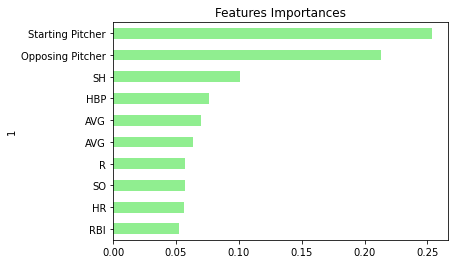

In [50]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
# cm = confusion_matrix(y_test, predictions)
# cm_df = pd.DataFrame(
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [ ]:
# combined_df = pd.DataFrame()

# for row in df_new.index:
#     for row_too in df_bat_avg.index:
#         if row_too == df_new["Opp"][row]:
#             combined_df.append(df_new.iloc[row],df_bat_avg.loc[row_too])
# #             break
        
#     if df_new["Opp"][row] = 
#     break

In [51]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

model = BalancedRandomForestClassifier(random_state=1)
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions,"Actual": y_test}).reset_index(drop=True)
confusion_matrix(y_test, predictions)

print(classification_report_imbalanced(y_test, y_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.43      0.67      0.58      0.52      0.62      0.39         9
          1       0.79      0.58      0.67      0.67      0.62      0.38        19

avg / total       0.67      0.61      0.64      0.62      0.62      0.38        28



In [52]:
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions,
                        "Actual": y_test}).reset_index(drop=True)
balanced_accuracy_score(y_test, predictions)

0.6228070175438596

In [53]:
from sklearn import tree, preprocessing
from sklearn.tree import DecisionTreeClassifier

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.56      0.45         9
           1       0.73      0.58      0.65        19

    accuracy                           0.57        28
   macro avg       0.56      0.57      0.55        28
weighted avg       0.62      0.57      0.59        28



In [54]:
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions,
                        "Actual": y_test}).reset_index(drop=True)
balanced_accuracy_score(y_test, predictions)

0.5672514619883041

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
predicted_y_values = model.predict(X_test)


In [60]:
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions,
                        "Actual": y_test}).reset_index(drop=True)
balanced_accuracy_score(y_test, predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets